In [0]:
import torch
import pandas as pd
from torch.utils.data import Dataset

In [0]:
class IrisDataset(Dataset):
  
  def __init__(self):
    self.data = pd.read_csv('./Iris.csv')
    
  def __len__(self):
    return len(self.data)
  
  def __getitem__(self,idx):
    return self.data.iloc[idx]
  
    

In [0]:
iris = IrisDataset()
len(iris),iris[0]

In [0]:
class TensorIrisDataset(IrisDataset):
  def __getitem__(self,idx):
    sample = super().__getitem__(idx)
    return {
        'tensor':torch.tensor([sample.SepalLengthCm,
                              sample.SepalWidthCm,
                              sample.PetalLengthCm,
                              sample.PetalWidthCm]),
        'label':sample.Species
    }

In [0]:
tensors = TensorIrisDataset()
len(tensors),tensors[0]

In [0]:
from torch.utils.data import DataLoader

In [0]:
loader = DataLoader(tensors,batch_size = 16,shuffle = True)
for batch in loader:
  print(batch)

In [0]:
parallel_loader = DataLoader(tensors,batch_size = 16,shuffle = True,num_workers = 4)
for batch in parallel_loader:
  print(batch)

In [18]:
import torchvision
import matplotlib.pyplot as plt
dir(torchvision.datasets)

['CIFAR10',
 'CIFAR100',
 'Caltech101',
 'Caltech256',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'DatasetFolder',
 'EMNIST',
 'FakeData',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'ImageFolder',
 'ImageNet',
 'KMNIST',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Omniglot',
 'PhotoTour',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SVHN',
 'VOCDetection',
 'VOCSegmentation',
 'VisionDataset',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'caltech',
 'celeba',
 'cifar',
 'cityscapes',
 'coco',
 'fakedata',
 'flickr',
 'folder',
 'imagenet',
 'lsun',
 'mnist',
 'omniglot',
 'phototour',
 'sbd',
 'sbu',
 'semeion',
 'stl10',
 'svhn',
 'utils',
 'vision',
 'voc']

In [19]:
cifar = torchvision.datasets.CIFAR10('./var',download = True)

0it [00:00, ?it/s]

170500096it [00:04, 41069176.57it/s]                               


In [20]:
cifar[0]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F83B7721048>, 6)

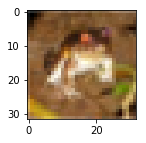

In [21]:
fig = plt.figure(figsize = (2,2))
sub = fig.add_subplot(111)
sub.imshow(cifar[0][0])

In [0]:
from torchvision import transforms
pipeline = transforms.Compose([transforms.ToTensor()])
cifar_tr = torchvision.datasets.CIFAR10('./var',transform = pipeline)

In [23]:
cifar_tr[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,